In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/cleaned/filtered_table.csv')

df.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,Cash loans,F,N,N,0,90000.0,199008.0,Working,Secondary / secondary special,...,Country-wide,Consumer electronics,high,Cash X-Sell: high,365243.0,-509.0,-179.0,-209.0,-203.0,0.0
1,0,Cash loans,F,N,Y,0,202500.0,604152.0,Working,Secondary / secondary special,...,Credit and cash offices,XNA,XNA,Cash,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0
2,0,Cash loans,F,N,Y,0,108000.0,746280.0,Pensioner,Higher education,...,Credit and cash offices,XNA,XNA,Card Street,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0
3,0,Cash loans,M,Y,Y,1,540000.0,675000.0,Commercial associate,Higher education,...,Credit and cash offices,XNA,XNA,Cash,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0
4,0,Cash loans,M,Y,Y,1,540000.0,675000.0,Commercial associate,Higher education,...,Credit and cash offices,XNA,XNA,Card Street,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0


In [3]:
numeric_columns = df.select_dtypes(exclude=['object'])
categorical_columns = df.select_dtypes(include=['object'])

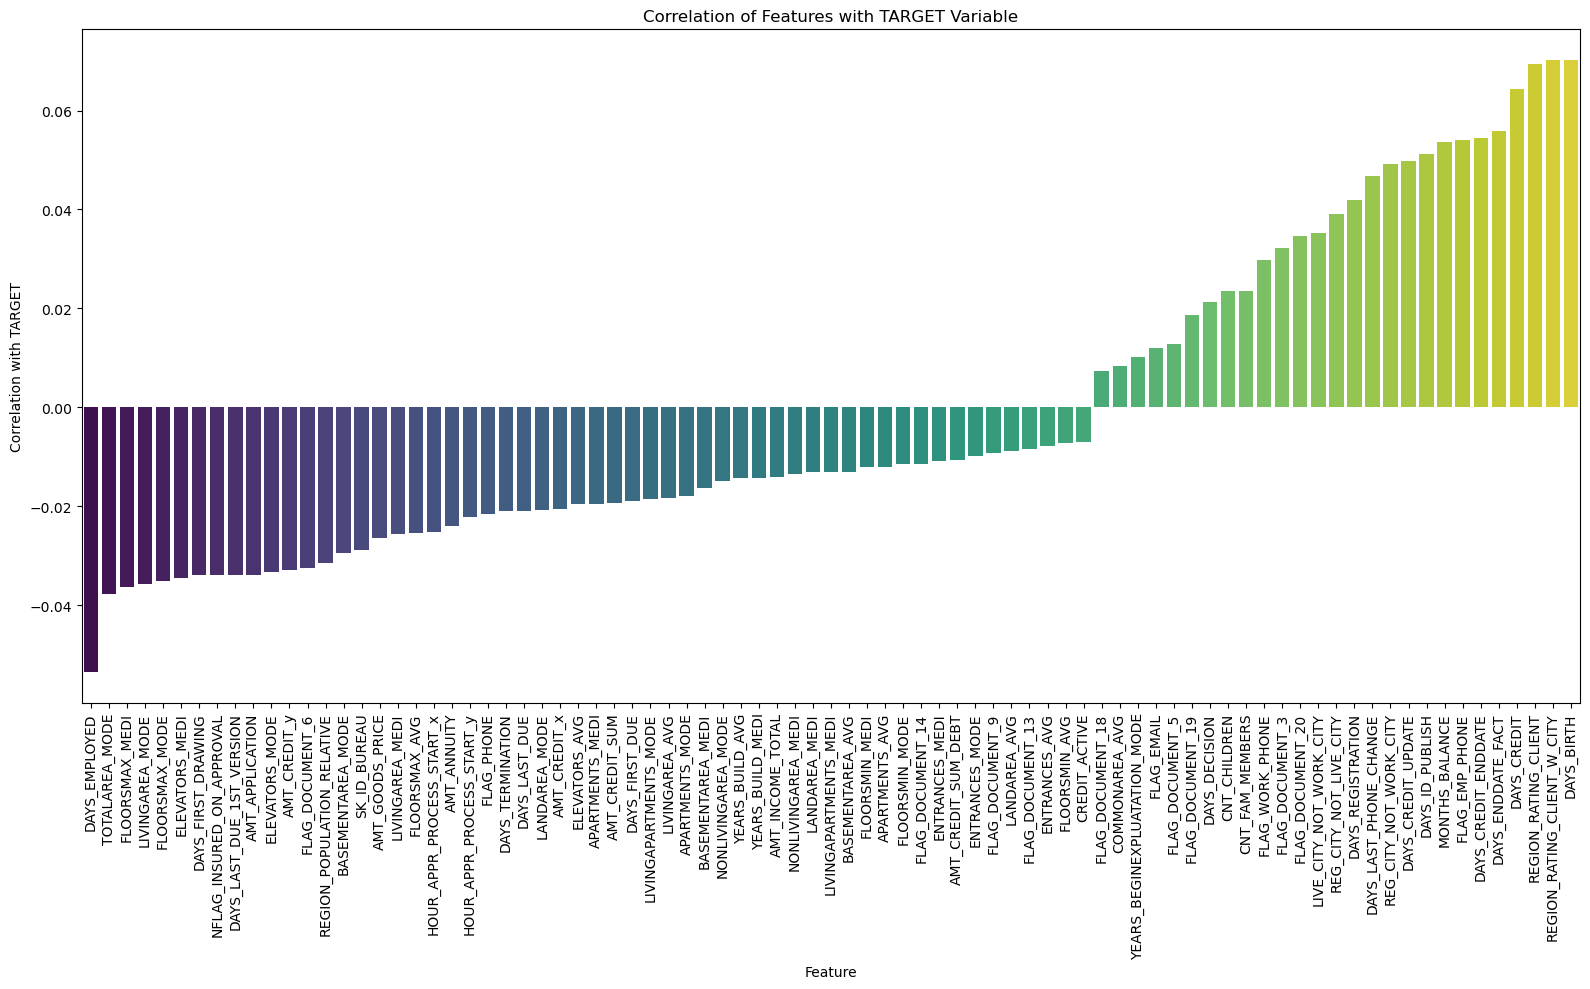

In [4]:
#correlation matrix regarting TARGET (numeric_columns)
correlation_matrix = numeric_columns.corr()

correlation_with_target = correlation_matrix['TARGET']

sorted_correlation = correlation_with_target.drop('TARGET').sort_values()

plt.figure(figsize=(16, 10))
sns.barplot(x=sorted_correlation.index, y=sorted_correlation.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Correlation with TARGET')
plt.title('Correlation of Features with TARGET Variable')
plt.tight_layout()
plt.show()

In [5]:
#printing out correlation values
correlation_matrix = numeric_columns.corr()
correlation_with_target = correlation_matrix['TARGET']

sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)

sorted_correlation

TARGET                         1.000000
DAYS_BIRTH                     0.070220
REGION_RATING_CLIENT_W_CITY    0.070176
REGION_RATING_CLIENT           0.069443
DAYS_CREDIT                    0.064252
                                 ...   
COMMONAREA_AVG                 0.008423
ENTRANCES_AVG                  0.007826
FLAG_DOCUMENT_18               0.007255
FLOORSMIN_AVG                  0.007222
CREDIT_ACTIVE                  0.007072
Name: TARGET, Length: 84, dtype: float64

In [7]:
# columns_to_drop = sorted_correlation[(sorted_correlation.isnull()) | (sorted_correlation < 0.05)].index
# df = df.drop(columns=columns_to_drop)

In [6]:
df.shape

(86805, 112)

In [7]:
df.dtypes

TARGET                         int64
NAME_CONTRACT_TYPE_x          object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
FLAG_OWN_REALTY               object
                              ...   
DAYS_FIRST_DUE               float64
DAYS_LAST_DUE_1ST_VERSION    float64
DAYS_LAST_DUE                float64
DAYS_TERMINATION             float64
NFLAG_INSURED_ON_APPROVAL    float64
Length: 112, dtype: object

In [8]:
#encoding categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

df_encoded = pd.get_dummies(df, columns=categorical_columns)

df_encoded.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,...,PRODUCT_COMBINATION_Cash Street: middle,PRODUCT_COMBINATION_Cash X-Sell: high,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS other with interest
0,0,0,90000.0,199008.0,0.010032,-12974,-4404,-7123.0,-4464,1,...,0,1,0,0,0,0,0,0,0,0
1,0,0,202500.0,604152.0,0.009175,-16971,-475,-3148.0,-513,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,108000.0,746280.0,0.010966,-23548,365243,-5745.0,-4576,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,540000.0,675000.0,0.026392,-18632,-6977,-3904.0,-1937,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,540000.0,675000.0,0.026392,-18632,-6977,-3904.0,-1937,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_encoded.shape

(86805, 296)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

#splitting data into train/test
X = df_encoded.drop('TARGET', axis=1)
y = df_encoded['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

#scaling/normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     15755
           1       0.47      0.00      0.01      1606

    accuracy                           0.91     17361
   macro avg       0.69      0.50      0.48     17361
weighted avg       0.87      0.91      0.86     17361



In [11]:
from sklearn.ensemble import RandomForestClassifier

#random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     15755
           1       1.00      0.75      0.85      1606

    accuracy                           0.98     17361
   macro avg       0.99      0.87      0.92     17361
weighted avg       0.98      0.98      0.98     17361

